# Informacion
Se pretende hacer un analisis de casos de infidelidades para saber que factores son los que influyen en el comportamiento de un grupo de personas, se pretende usar algun metodo para predecir que porcentaje de personas son propensas a ser infieles. Tener en claro que son aproximadamente 600 personas, por lo que la muestra no puede extrapolar mas que a un sector local de la poblacion donde se tomo la muestra.

# DataSet
El data set fue otorgado por un reclutador para evaluar la capacidad de analisis de un problema, dando una base de datos en formato CSV. Descripción de Variables:

Infidelidades Numérico. Cuántas relaciones sexuales extramaritales ha tenido el año anterior?

Genero Factor. Indica el sexo de la persona

Edad Variable Numérica codificada: 17.5 = bajo 20, 22 = 20–24, 27 = 25–29, 32 = 30–34, 37 = 35–39, 42 = 40–44, 47 = 45–49, 52 = 50–54, 57 = 55 o más.

Años casado Variable Numérica codificada: 0.125 = 3 meses o menos, 0.417 = 4–6 meses, 0.75 = 6 meses–1 año, 1.5 = 1–2 años, 4 = 3–5 años, 7 = 6–8 años, 10 = 9–11 años, 15 = 12 o más años.

Hijos del matrimonio Factor. Hay niños nacidos en el matrimonio?

Religiosidad Variable Numérica codificada: 1 = nada, 2 = poco, 3 = indiferente, 4 = algo, 5 = muy.

Educación Variable Numérica codificada: 9 =básica, 12 = media, 14 =Superior Incompleto, 16 y 17 = Superior, 18 = Magister, 20 = Doctorado o Postdoctorado.

Ocupación Númerica Ocupación en relación a la clasificación de Hollingshead.

Calidad del Matrimonio

Variable Numérica codificada: 1 = muy infeliz, 2 = infeliz, 3 = medianamente, 4 = más feliz que la media, 5 = muy feliz.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("inf_main.csv")

df.drop(['ID'],1, inplace=True)

df["Infidelidades"] = df["Infidelidades"].replace(df[df.ix[:,0]>1]['Infidelidades'],1)

df["Genero"] = df["Genero"].replace(['hombre'],0)
df["Genero"] = df["Genero"].replace(['mujer'],1)

df["Hijos del matrimonio"] = df["Hijos del matrimonio"].replace(['no'],0)
df["Hijos del matrimonio"] = df["Hijos del matrimonio"].replace(['si'],1)

df["Edad"] = pd.to_numeric(df["Edad"].str.replace(',','.'), errors='coerce')
df["Años casado"] = pd.to_numeric(df["Años casado"].str.replace(',','.'), errors='coerce')

print(pd.DataFrame((df["Infidelidades"]).groupby(df["Genero"]).mean()),"\n")
print(pd.DataFrame((df["Infidelidades"]).groupby(df["Genero"]).median()),"\n")
print(pd.DataFrame((df["Infidelidades"]).groupby(df["Genero"]).count()),"\n")

print (df.mean(),"\n")
print (df.median(),"\n")

print (df.head())


/home/spawnqq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


        Infidelidades
Genero               
0            0.272727
1            0.228571 

        Infidelidades
Genero               
0                   0
1                   0 

        Infidelidades
Genero               
0                 286
1                 315 

Infidelidades              0.249584
Genero                     0.524126
Edad                      32.487521
Años casado                8.177696
Hijos del matrimonio       0.715474
Religiosidad               3.116473
Educacion                 16.166389
Ocupacion                  4.194676
Calidad del Matrimonio     3.931780
dtype: float64 

Infidelidades              0.0
Genero                     1.0
Edad                      32.0
Años casado                7.0
Hijos del matrimonio       1.0
Religiosidad               3.0
Educacion                 16.0
Ocupacion                  5.0
Calidad del Matrimonio     4.0
dtype: float64 

   Infidelidades  Genero  Edad  Años casado  Hijos del matrimonio  \
0              0       0

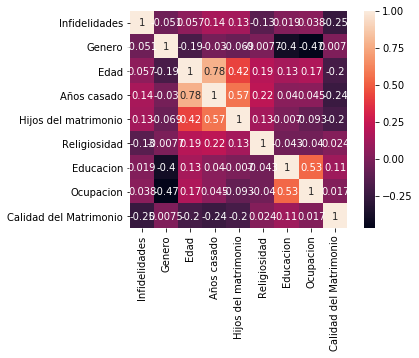

In [4]:
import seaborn as sns

sns.heatmap(df.corr(), square = True, annot = True)

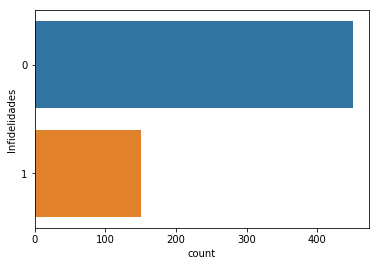

In [5]:
sns.countplot(y='Infidelidades',data=df)

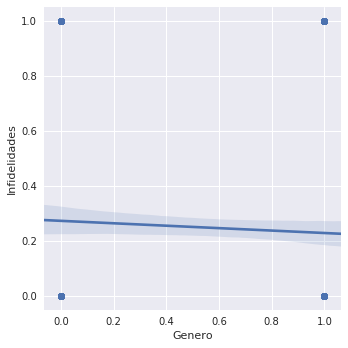

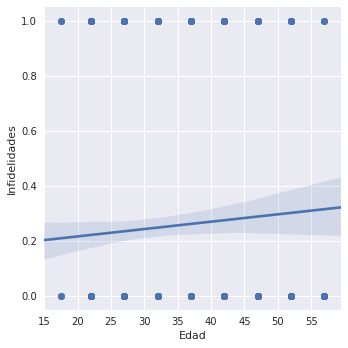

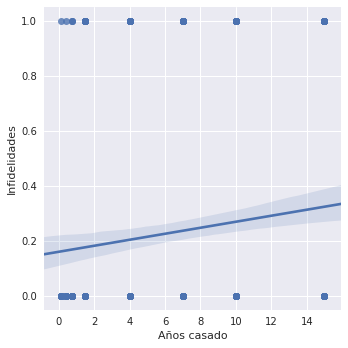

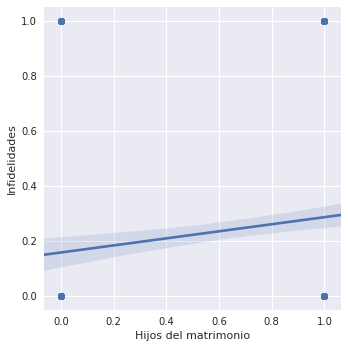

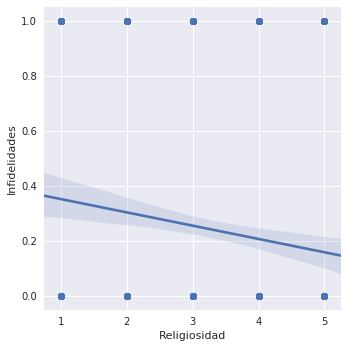

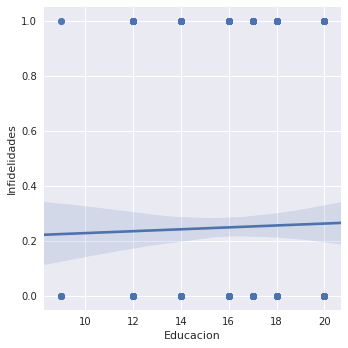

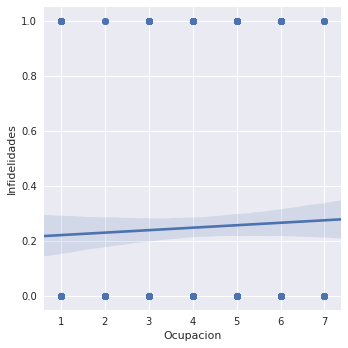

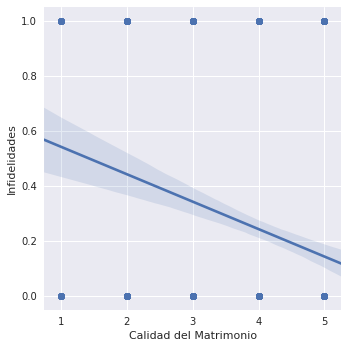

In [48]:
sns.lmplot("Genero","Infidelidades",data = df)
sns.lmplot("Edad","Infidelidades",data = df)
sns.lmplot("Años casado","Infidelidades",data = df)
sns.lmplot("Hijos del matrimonio","Infidelidades",data = df)
sns.lmplot("Religiosidad","Infidelidades",data = df)
sns.lmplot("Educacion","Infidelidades",data = df)
sns.lmplot("Ocupacion","Infidelidades",data = df)
sns.lmplot("Calidad del Matrimonio","Infidelidades",data = df)

/home/spawnqq/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


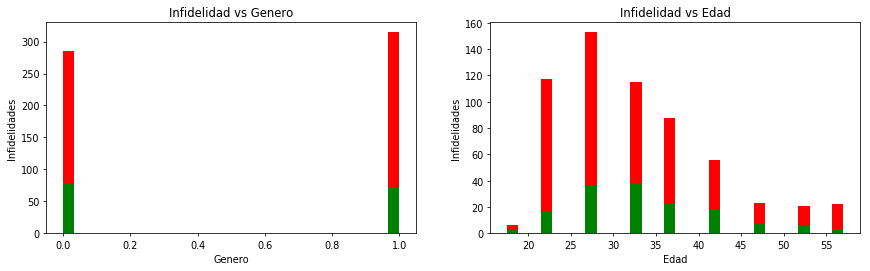

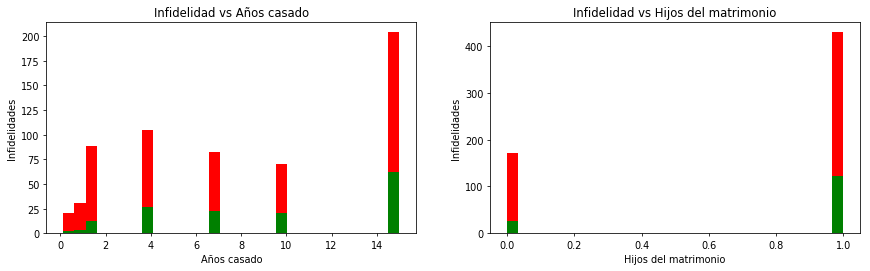

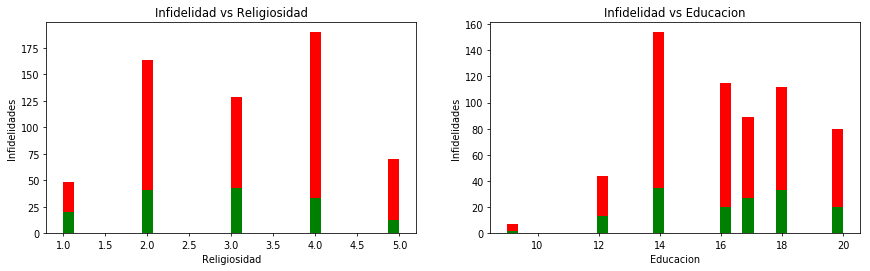

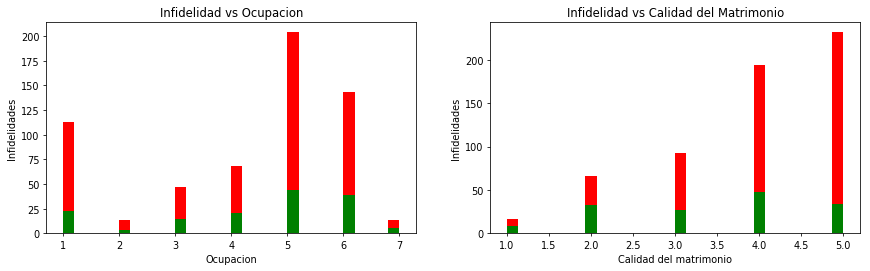

In [28]:
#Primer par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Infidelidad vs Genero")
plt.xlabel("Genero")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Genero'],df[df['Infidelidades']==0]['Genero']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])

plt.subplot(1,2,2)
plt.title("Infidelidad vs Edad")
plt.xlabel("Edad")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Edad'],df[df['Infidelidades']==0]['Edad']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.show()

#Segundo par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Infidelidad vs Años casado")
plt.xlabel("Años casado")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Años casado'],df[df['Infidelidades']==0]['Años casado']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])

plt.subplot(1,2,2)
plt.title("Infidelidad vs Hijos del matrimonio")
plt.xlabel("Hijos del matrimonio")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Hijos del matrimonio'],df[df['Infidelidades']==0]['Hijos del matrimonio']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.show()

#Tercer par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Infidelidad vs Religiosidad")
plt.xlabel("Religiosidad")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Religiosidad'],df[df['Infidelidades']==0]['Religiosidad']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])

plt.subplot(1,2,2)
plt.title("Infidelidad vs Educacion")
plt.xlabel("Educacion")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Educacion'],df[df['Infidelidades']==0]['Educacion']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.show()

#Cuarto par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Infidelidad vs Ocupacion")
plt.xlabel("Ocupacion")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Ocupacion'],df[df['Infidelidades']==0]['Ocupacion']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])

plt.subplot(1,2,2)
plt.title("Infidelidad vs Calidad del Matrimonio")
plt.xlabel("Calidad del matrimonio")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Calidad del Matrimonio'],df[df['Infidelidades']==0]['Calidad del Matrimonio']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.show()

In [8]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = df["Infidelidades"]

X = df.ix[:,1:9]

print(df.head(),"\n")

print(y.head(),"\n")

print(X.head(),"\n")

   Infidelidades  Genero  Edad  Años casado  Hijos del matrimonio  \
0              0       0  37.0         10.0                     0   
1              0       1  27.0          4.0                     0   
2              1       0  27.0          1.5                     0   
3              0       1  32.0         15.0                     1   
4              1       1  27.0          4.0                     1   

   Religiosidad  Educacion  Ocupacion  Calidad del Matrimonio  
0             3         18          7                       4  
1             4         14          6                       4  
2             3         18          4                       4  
3             1         12          1                       4  
4             3         17          1                       5   

0    0
1    0
2    1
3    0
4    1
Name: Infidelidades, dtype: int64 

   Genero  Edad  Años casado  Hijos del matrimonio  Religiosidad  Educacion  \
0       0  37.0         10.0                     

In [9]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2) 

print (X_train.shape, y_train.shape) 
print (X_test.shape, y_test.shape)


(480, 8) (480,)
(121, 8) (121,)


In [10]:
lm = LogisticRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0,0.5,'Predictions')

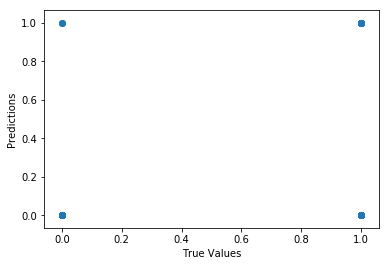

In [11]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

print(predictions)
print(model.predict_proba(X_test))

[[88  2]
 [24  7]]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0]
[[0.78081618 0.21918382]
 [0.82856316 0.17143684]
 [0.90063239 0.09936761]
 [0.90388246 0.09611754]
 [0.82771003 0.17228997]
 [0.65125447 0.34874553]
 [0.88795284 0.11204716]
 [0.69619356 0.30380644]
 [0.78533957 0.21466043]
 [0.32065606 0.67934394]
 [0.75412955 0.24587045]
 [0.78772467 0.21227533]
 [0.91235528 0.08764472]
 [0.76220922 0.23779078]
 [0.85815501 0.14184499]
 [0.56300568 0.43699432]
 [0.79380897 0.20619103]
 [0.70615034 0.29384966]
 [0.65292969 0.34707031]
 [0.8338106  0.1661894 ]
 [0.86608903 0.13391097]
 [0.55946379 0.44053621]
 [0.61181279 0.38818721]
 [0.91897553 0.08102447]
 [0.89904086 0.10095914]
 [0.80991558 0.19008442]
 [0.88902132 0.11097868]
 [0.7869824  0.2130176 ]
 [0.81813917 0.18186083]
 [0.46212

In [13]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.79      0.98      0.87        90
          1       0.78      0.23      0.35        31

avg / total       0.78      0.79      0.74       121



In [14]:
print ("Score:", model.score(X_test, y_test))

Score: 0.7851239669421488


In [15]:
from sklearn.tree import DecisionTreeClassifier

clf =  DecisionTreeClassifier ()
clf.fit(X_train, y_train)
C = clf.feature_importances_
for i in range(len((C))):
    print(X.columns[i], ': ', C[i]*100)

Genero :  3.7889206116414624
Edad :  21.69201582117215
Años casado :  9.995474575374354
Hijos del matrimonio :  4.689258518425264
Religiosidad :  15.726938823723124
Educacion :  13.683536476516132
Ocupacion :  18.158433495852115
Calidad del Matrimonio :  12.265421677295404


In [16]:
from sklearn.model_selection import KFold, cross_val_score

def accuracy(model):
    kf = KFold(n_splits=5)
    crv = cross_val_score(model, X_train, y_train, cv=kf,scoring='accuracy')
   
    return crv.mean()

accuracy(LogisticRegression())

0.7479166666666667

In [19]:
prom_inf = 0
pred_inf = 0
for i in range(len(predictions)):
    if predictions[i] == 1:
        pred_inf = pred_inf + 1
    if y_test.iloc[i] == 1:
        prom_inf = prom_inf + 1


prom_inf = (prom_inf / len(predictions) )* 100
pred_inf = (pred_inf / len(predictions) )* 100
tasa_error = ((prom_inf - pred_inf) / prom_inf) * 100

print("Real promedio infidelidades: ",round(prom_inf, 2),"%")
print("Prediccion promedio infidelidades: ",round(pred_inf,2),"%")
print("Tasa de error: ", round(tasa_error,2), "%")

Real promedio infidelidades:  25.62 %
Prediccion promedio infidelidades:  7.44 %
Tasa de error:  70.97 %
